In [1]:
import argparse
import os
import shutil
import sys
import pickle
import h5py
import torch
import numpy as np
import json
import lib.init as init
from lib.runner import runner
import matplotlib.pyplot as plt

In [4]:
# save stdout and stderr location
stdout = sys.stdout
stderr = sys.stderr

config_file = 'configs/re30k/pod/pod_case4_re30k.json'
with open(config_file, "r") as f:
    config = json.load(f)
        
config['overwrite'] = None
config['mode'] = 'eval'
config['name'] = 'pod_case4_re30k'
config['log'] = 'file'
device = ('cuda' if torch.cuda.is_available() else "cpu")
config['device'] = device
run = runner(config)

# reopen stdout and stderr
sys.stdout = stdout
sys.stderr = stderr

In [5]:
time_lag = run.config['params']['time_lag']

In [6]:
train_indices = run.train_indices

In [11]:
# extract PSD of TKE from ground truth data and evaluate cumsum of energy content across frequencies
from scipy.signal import welch
with h5py.File(run.paths_bib.data_path, 'r') as f:
    TKE = f[run.paths_bib.latent_id + '_tke_true'][:]
    f, Pxx_true = welch(TKE, fs=100)
    Pxx_true_cumsum = np.cumsum(Pxx_true)/np.sum(Pxx_true)

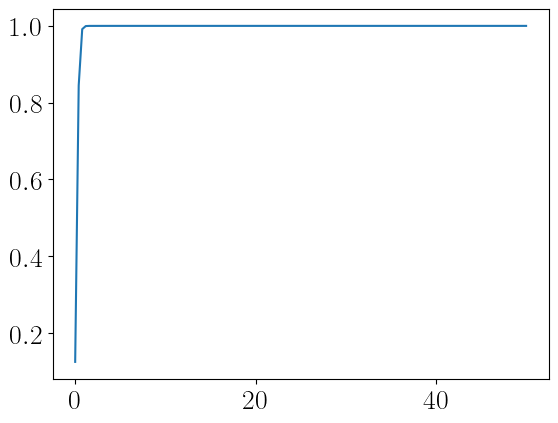

In [14]:
plt.plot(f, Pxx_true_cumsum)

In [15]:
# print point of energy content reaching 99%
for i in range(len(Pxx_true_cumsum)):
    if Pxx_true_cumsum[i] >= 0.99:
        print(f"99% energy content reached at frequency: {f[i]} Hz")
        break

99% energy content reached at frequency: 0.78125 Hz
